<a href="https://colab.research.google.com/github/nd-hernandez2021/nh.hf-cohort2/blob/main/Unit3_Lessson7_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment Details:
####Due Date: 02/25/2022 no later than 11:59 PM
####The dataset has multiple medical indictors and diseases, your task is to create a descriptive analysis of data within the dataset.

####For example, you’re interested in investigating heart disease. Within the dataset, can you find any indicators that seem to influence the risk of heart disease?  How do different states compare?

##For this dataset, you will need to use:
#####-Data wrangling and cleaning
#####-Renaming variables
#####-Filtering data
#####-Data aggregation 
#####-Data Visualization techniques
#####-Descriptive statistics 
#####-Detailed descriptions of everything in your dataset – look up how to add markdown to your notebook


In [1]:
## Import Python packages and Library to use in my dataset

import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import my database

df = pd.read_csv ('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
# Function to get a quick overview and dataframe details  
# Can also use other functions such as df.describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# Dataset view from above has a lot of Columns and information I do not need for my analysys. 
# Dropping all columns not useful from my dataset.

df=df.drop(df.columns[[5,6,7,8,10,11,15,16,17,18,19,20,22,
                       24,25,26,27,28,29,30,31,32,33,34,35,36,
                       37,38,39,40,41,42,43,44,45,46,47]],axis=1)

In [5]:
# Function to get a quick overview and dataframe details after all columns not needed were dropped
# This datafram has all the data i need to begin my analysis after furhter clean up of my data is done/
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   encounter_id        101766 non-null  int64 
 1   patient_nbr         101766 non-null  int64 
 2   race                101766 non-null  object
 3   gender              101766 non-null  object
 4   age                 101766 non-null  object
 5   time_in_hospital    101766 non-null  int64 
 6   num_lab_procedures  101766 non-null  int64 
 7   num_procedures      101766 non-null  int64 
 8   num_medications     101766 non-null  int64 
 9   number_diagnoses    101766 non-null  int64 
 10  A1Cresult           101766 non-null  object
 11  diabetesMed         101766 non-null  object
 12  readmitted          101766 non-null  object
dtypes: int64(7), object(6)
memory usage: 10.1+ MB


In [8]:
# Groupby for each Object Datatype Column to see what categorys are listed and total volume for each
# to continue to clean up my Dataset

#   1 - Race Column consists of '?' category - these will be changed and grouped wtih 'Other' Category
#   2 - Gender Column contains 3 rows of "unknown/invalid" - these rows will be changed to 'Female'
#       or 'Male' to clean data.  the change is minimal and wont impact data analysys
#   3 - Age Column is actually group of ages and will be kept as is.  

df.groupby(['race'])['encounter_id'].count(), df.groupby(['gender'])['encounter_id'].count(), df.groupby(['age'])['encounter_id'].count()

# There is no break in the output below, however there are three separate groupby tables as listed above

(race
 ?                   2273
 AfricanAmerican    19210
 Asian                641
 Caucasian          76099
 Hispanic            2037
 Other               1506
 Name: encounter_id, dtype: int64, gender
 Female             54708
 Male               47055
 Unknown/Invalid        3
 Name: encounter_id, dtype: int64, age
 [0-10)        161
 [10-20)       691
 [20-30)      1657
 [30-40)      3775
 [40-50)      9685
 [50-60)     17256
 [60-70)     22483
 [70-80)     26068
 [80-90)     17197
 [90-100)     2793
 Name: encounter_id, dtype: int64)

In [13]:
## in the Race Column - Replace all "?" values and grouped them with already existing "Other" category
## (Could have also renamed these as 'Unknow' and used as it's own category ???)
df['race'] = df['race'].str.replace('?', 'Other')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
## Function remove unwanted characters from the 'age' column in my Dataset. 
## Remoing the '[' and ')' at the beggining and end of my age group categories

df['age'] = df['age'].str.strip('[)')

In [14]:
# Function to Locate the three rowa with value 'Unknown/Invalid' in genter column to manually 
# change and assin a value that aligns with the rest of the column values. 

#   As there are only three rows in a dataset of over 100K rows, I determined this would not impact
#   my data analysis later, but felt it was important to keep the rows instead of dropping them

df.loc[df['gender']== 'Unknown/Invalid']

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,diabetesMed,readmitted
30506,98634858,100695042,Other,Unknown/Invalid,70-80,1,5,5,22,4,None,Yes,NO
75551,226864668,60524946,Other,Unknown/Invalid,60-70,1,38,1,6,5,None,No,NO
82573,257364294,78119847,Other,Unknown/Invalid,70-80,8,59,2,21,9,None,Yes,NO


In [15]:
# Rows located that contain 'Unknown/Invalid' in the Gender Column are being randomnly assigned 
# a value of 'Male' or 'Felmale' to align with all other records in this column

df.loc[30506,'gender'] = 'Female'
df.loc[75551,'gender'] = 'Male'
df.loc[82573,'gender'] = 'Female'

df.groupby(['gender'])['encounter_id'].count()

# Output Groupby now reflects all records with wither 'Female', or 'Male' gender

gender
Female    54710
Male      47056
Name: encounter_id, dtype: int64

In [17]:
# Renamed remaining columns in my Dataset to clarify and add level of detial to comlumn headers
# to align with the column values

df = df.rename(columns={
    'encounter_id' : 'visit_id', 
    'race' : 'patient_race',
    'gender' : 'patient_gender',
    'age' : 'patient_age_group', 
    'time_in_hospital' : 'days_in_hospital', 
    'number_diagnoses' : 'num_diagnoses'})

In [18]:
# Function to get a quick overview and dataframe details after modification and clean up of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   visit_id            101766 non-null  int64 
 1   patient_nbr         101766 non-null  int64 
 2   patient_race        101766 non-null  object
 3   patient_gender      101766 non-null  object
 4   patient_age_group   101766 non-null  object
 5   days_in_hospital    101766 non-null  int64 
 6   num_lab_procedures  101766 non-null  int64 
 7   num_procedures      101766 non-null  int64 
 8   num_medications     101766 non-null  int64 
 9   num_diagnoses       101766 non-null  int64 
 10  A1Cresult           101766 non-null  object
 11  diabetesMed         101766 non-null  object
 12  readmitted          101766 non-null  object
dtypes: int64(7), object(6)
memory usage: 10.1+ MB


In [19]:
# Creating Separare Database for each of the Patient Races to use later in my Analysys, as well 
# as creating a database for easier view of data in list format.

df2_caucasian=df[df['patient_race']=='Caucasian']
df2_african_american=df[df['patient_race']=='AfricanAmerican']
df2_asian=df[df['patient_race']=='Asian']
df2_hipanic=df[df['patient_race']=='Hispanic']
df2_other=df[df['patient_race']=='Other']
df3=df.groupby(['patient_race'])['visit_id'].count()
df4=df.groupby(['patient_age_group'])['visit_id'].count()

In [20]:
# databsee created for View volume of by patient race
df3

patient_race
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               3779
Name: visit_id, dtype: int64

In [21]:
# databsee created for View volume of by patient age group
df4

patient_age_group
0-10        161
10-20       691
20-30      1657
30-40      3775
40-50      9685
50-60     17256
60-70     22483
70-80     26068
80-90     17197
90-100     2793
Name: visit_id, dtype: int64

##Begin of visual data analysis and observations for each analytical question

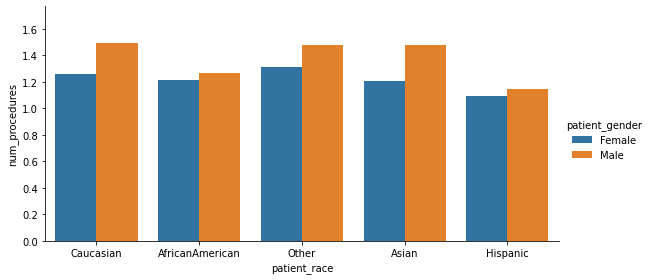

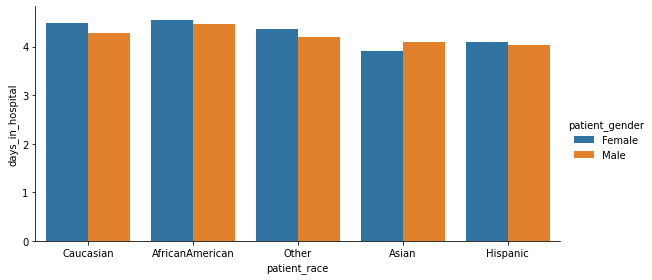

In [22]:
## Analyze: What race group - categorized by gender, have longer days spent in the hopital based on 
##          the number of procedures completed for the smae race group and category?

## Observation: Based on the visualization below, male patients generally have more procedures
##              completed across all race groups, compared to female patients - however, female
##              patients, spend more days in the hospital, across all patient groups, than their
##              male counterpart

##              Additionally, the hipanic race group number of procedures as compared to the days 
##              spend in the hospital - are lower than any other race group, and the gap between
##              genders for the hispanic race group is smaller for both number of procedures, as
##              well as days spent in the hospital.


sns.set_palette('tab10')
sns.catplot(y="num_procedures",
            x="patient_race", 
            data=df, 
            hue='patient_gender', 
            kind='bar', 
            height=4,
            aspect=2,
            palette='tab10',
            errwidth=0)

sns.set_palette('tab10')
sns.catplot(y="days_in_hospital",
            x="patient_race", 
            data=df, 
            hue='patient_gender', 
            kind='bar', 
            height=4,
            aspect=2,
            palette='tab10',
            errwidth=0)

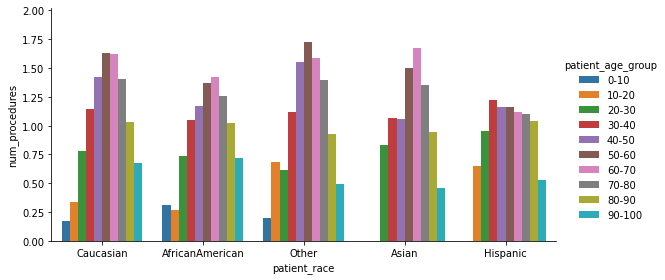

In [23]:
## Analize: Comparing the numnber of procedures for each race category, which age groups typically
##          have more procedures completed?  

## Observation: from all age groups listed, the age groups that typically have more procedures 
##              completed are age group 40-50, age group 50-60, and age group 60-60 - this is 
##              true for all races, except for the hispanic population - which apper to have less
##              prodcedures completed, with the age group between 30-40 being the highest, as
##              as opposed to all other races age groups.

sns.set_palette('tab10')
sns.catplot(#x="patient_age_group", 
            #y="days_in_hospital", 
            x="patient_race",
            y="num_procedures", 
            data=df, 
            hue='patient_age_group', 
            kind='bar', 
            height=4,
            aspect=2,
            palette='tab10',
            errwidth=0)


##below are additional practice visualization charts while completing the project

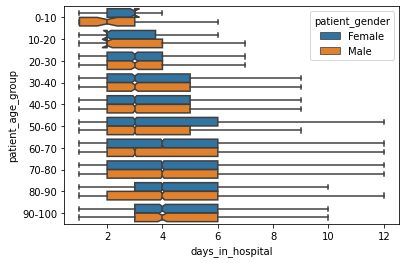

In [24]:
sns.boxplot(x='days_in_hospital',
            y='patient_age_group',
            data=df, 
            hue='patient_gender', 
            notch='True',
            showfliers=False)
plt.show()

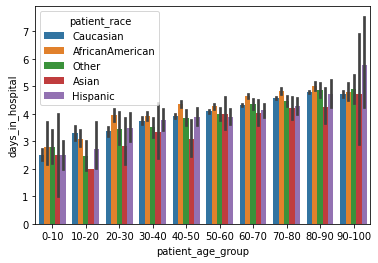

In [26]:
sns.barplot(x='patient_age_group', 
            y='days_in_hospital', 
            hue='patient_race', 
            data=df)

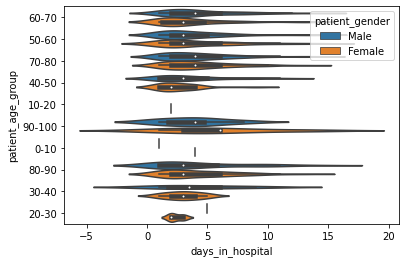

In [27]:
sns.violinplot(x='days_in_hospital',
            y='patient_age_group',
            data=df2_asian, 
            hue='patient_gender', 
            showfliers=False)
plt.show()